# Анализ коров от ассоциацией пастбищ «ЭкоФерма

**Описание проекта:** Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

**Цель исследования:** Необходимо разработать модель машинного обучения, которая поможет управлять рисками и принимать объективное решение о покупке. Необходимо создать две прогнозные модели для отбора бурёнок в поголовье:
- Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

**Ход исследования:**

- Подготовка данных: загрузка и изучение общей информации из представленных датасетов.
- Предобработка данных: поиск пропущенных значений, корректировка типа данных, дубликатов и других аномалий.
- Корреляционный анализ признаков: изучение взаимосвязей между признаками и построение диаграмм рассеивания.
- Решение задач регрессии и классификации: оценка точности по метрикам MSE, MAE, RMSE и R2 для регрессии, а также accuracy, recall, precision для классификации.

**Общий вывод:** резюмирование полуенных результатов, формулировка ключевых выводов и результатов.

In [1]:
!pip install phik -q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score,
    mean_squared_error,
    mean_absolute_error,
    precision_recall_curve
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
import phik

## 1. Загрузка данных

##### 1.1. Считаем CSV-файлы

In [3]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

##### 1.2. Выведим первые 10 строк каждого набора

**1.2.1. Начнем с текущего стада фермера**

In [4]:
ferma_main.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
5,6,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет
6,7,5910,"13,2",1792,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,48","3,077",вкусно,более_2_лет
7,8,6179,"14,7",1806,"0,93",Вис Бик Айдиал,Равнинные,Айдиал,"3,55","3,076",вкусно,более_2_лет
8,9,6783,"14,2",1918,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,077",вкусно,более_2_лет
9,10,5339,"13,4",1791,"0,895",Вис Бик Айдиал,Холмистое,Соверин,"3,13","3,075",вкусно,менее_2_лет


In [5]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

*Из данных о стаде видно, что названия столбцов не соответствует стандартному написанию, а именно названия столбцов начинаются с заглавных букв и отсутствует snake_case. Также видно, что столбцы с количественными переменными имеет тип object, т.к. в числах присутствует запятая за место точки. Исправим эти недочеты.*

In [6]:
ferma_main = ferma_main.rename(columns={'Удой, кг': 'удой_кг', 'ЭКЕ (Энергетическая кормовая единица)': 'эке',
                                        'Сырой протеин, г': 'сырой_протеин_г', 'СПО (Сахаро-протеиновое соотношение)': 'спо',
                                       'Порода': 'порода', 'Тип пастбища': 'тип_пастбища',
                                        'порода папы_быка': 'порода_папы_быка', 'Жирность,%': 'жирность',
                                        'Белок,%': 'белок', 'Вкус молока': 'вкус_молока', 'Возраст': 'возраст'})

In [7]:
_wrong_col = ['эке', 'спо', 'жирность', 'белок']
for col in _wrong_col:
    ferma_main[col] = ferma_main[col].apply(lambda x: x.replace(',', '.')).astype('float')

In [8]:
ferma_main.head(10)

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


In [9]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   удой_кг           634 non-null    int64  
 2   эке               634 non-null    float64
 3   сырой_протеин_г   634 non-null    int64  
 4   спо               634 non-null    float64
 5   порода            634 non-null    object 
 6   тип_пастбища      634 non-null    object 
 7   порода_папы_быка  634 non-null    object 
 8   жирность          634 non-null    float64
 9   белок             634 non-null    float64
 10  вкус_молока       634 non-null    object 
 11  возраст           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


**1.2.2. Выведим информацию о папе коров из текущего стада фермера**

In [10]:
ferma_dad.head(10)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [11]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


*Из данных о папах стада видно, что название столбца "Имя Папы" не соответствует стандартному написанию, а именно название столбца "Имя Папы" начинается с заглавной буквы и отсутствует snake_case. С данными, на первый взгляд, проблем нет. Исправим на.*

In [12]:
ferma_dad = ferma_dad.rename(columns={'Имя Папы': 'имя_папы'})

**1.2.3. Выведим информацию о коровах Экофермы**

In [13]:
cow_buy.head(10)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


In [14]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


*Из данных о стаде Экофермы видно, что названия столбцов не соответствует стандартному написанию, а именно названия столбцов начинаются с заглавных букв и отсутствует snake_case. Также видно, что столбцы с количественными переменными имеет тип object, т.к. в числах присутствует запятая за место точки. Исправим эти недочеты.*

In [15]:
cow_buy = cow_buy.rename(columns={'Порода': 'порода', 'Тип пастбища': 'тип_пастбища', 'порода папы_быка': 'порода_папы_быка',
                                  'Имя_папы': 'имя_папы', 'Текущая_жирность,%': 'текущая_жирность',
                                  'Текущий_уровень_белок,%': 'текущий_уровень_белок', 'Возраст': 'возраст'})

In [16]:
_wrong_col = ['текущая_жирность', 'текущий_уровень_белок']
for col in _wrong_col:
    cow_buy[col] = cow_buy[col].apply(lambda x: x.replace(',', '.')).astype('float')

In [17]:
cow_buy.head(10)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [18]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   порода                 20 non-null     object 
 1   тип_пастбища           20 non-null     object 
 2   порода_папы_быка       20 non-null     object 
 3   имя_папы               20 non-null     object 
 4   текущая_жирность       20 non-null     float64
 5   текущий_уровень_белок  20 non-null     float64
 6   возраст                20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


## 2. Предобработка данных

В пункте 1.2 обработаны количественные данные. В этом пункте проверим категориальные данные в каждом наборе.

##### 2.1. Рассмотрим категориальные данные в информации о стаде фермера

In [19]:
_categ_data = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']
for col in _categ_data:
    print(ferma_main[col].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']
['вкусно' 'не вкусно']
['более_2_лет' 'менее_2_лет']


*Для типа пастбища видно, что есть некорректно внесенные данные по "Равнинное". Приведем в соответсвие.*

In [20]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].replace({'Равнинные': 'равнинное', 'Равнинное': 'равнинное',
                                                                'Холмистое': 'холмистое'})

In [21]:
ferma_main['тип_пастбища'].unique()

array(['равнинное', 'холмистое'], dtype=object)

*Для породы папы быка видно, что есть некорректно внесенные данные по "Айдиал". Приведем в соответсвие.*

In [22]:
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал')

In [23]:
ferma_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

##### 2.2. Рассмотрим категориальные данные в информации о папе коров из текущего стада фермера

In [24]:
ferma_dad['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

*Для категориальных данных в информации о папе коров из текущего стада фермера видно, что некорректных данных нет.*

##### 2.3. Рассмотрим категориальные данные в информации о коровах Экофермы

In [25]:
_categ_data = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст']
for col in _categ_data:
    print(cow_buy[col].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['Геркулес' 'Буйный' 'Барин' 'Соловчик']
['более_2_лет' 'менее_2_лет']


*Для категориальных данных в информации о коровах Экофермы видно, что некорректных данных нет.*

##### 2.4. Проверим данные на дубликаты

In [26]:
ferma_main.duplicated().sum()

5

*Выявлено 5 явных дубликатов, удалим их.*

In [27]:
ferma_main = ferma_main.drop_duplicates().reset_index(drop=True)

*Вывод по разделу*
- Выявлены и устранены неявные дубликаты в данных о коровах фермера;
- Выявлены 5 дубликатов в данных о коровах фермера;
- Категориальные данные соответствуют своему типу;
- Количественные данные приведены в соответветствии своему типу.

## 3. Исследовательский анализ данных

Проведем анализ данных стада фермера. Для коров Экофермы этого делать не будем, т.к. модель будет работать на основе данных от фермера.

##### 3.1. Проанализируем удой коров фермера

In [28]:
ferma_main['удой_кг'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой_кг, dtype: float64

*Из описания данных об удое видно, что имеется вброс, т.к. корова не может дать 45,6 тонн молока в год. Выведим это значение.*

In [29]:
ferma_main.loc[ferma_main['удой_кг'] == ferma_main['удой_кг'].max()]

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


*Произвести логическую замену не получится, поэтому лучше удалить эту строку. После построим график для удоя коров.*

In [30]:
ferma_main = ferma_main.drop(labels = [16], axis = 0)

In [31]:
ferma_main['удой_кг'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой_кг, dtype: float64

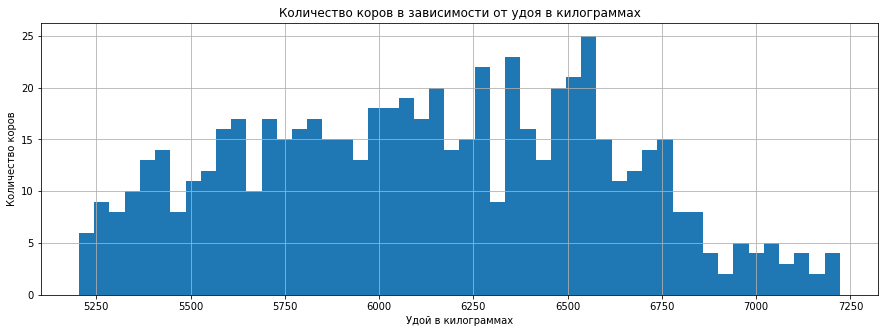

In [32]:
plt.figure(figsize=(15, 5))
plt.hist(ferma_main['удой_кг'], bins=50)
plt.title('Количество коров в зависимости от удоя в килограммах')
plt.xlabel('Удой в килограммах')
plt.ylabel('Количество коров')
plt.grid(True)
plt.show()

*Данные по удою имеют нормальное распределение. Среднее (6125 кг) и медианное (6130 кг) значения практически равны. Вбросов нет.*

##### 3.2. Проанализируем энергетическую кормовую единицу коров фермера

In [33]:
ferma_main['эке'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64

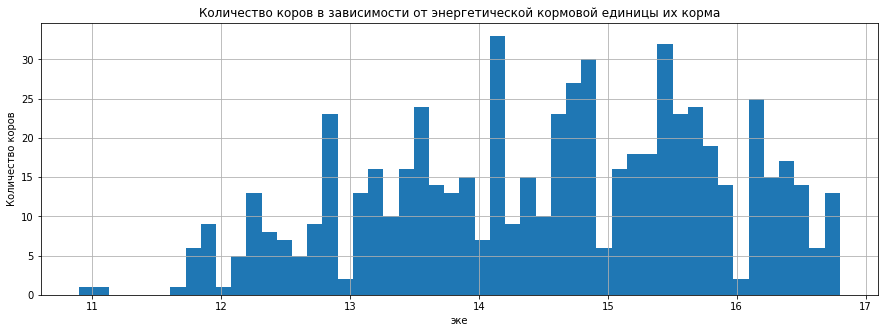

In [34]:
plt.figure(figsize=(15, 5))
plt.hist(ferma_main['эке'], bins=50)
plt.title('Количество коров в зависимости от энергетической кормовой единицы их корма')
plt.xlabel('эке')
plt.ylabel('Количество коров')
plt.grid(True)
plt.show()

*Данные по энергетической кормовой единице распределены неравномерно. Среднее (14.56) и медианное (14.7) значения практически равны. Вбросов нет.*

##### 3.3. Проанализируем сахаро-протеиновое соотношение корма коров фермера

In [35]:
ferma_main['спо'].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо, dtype: float64

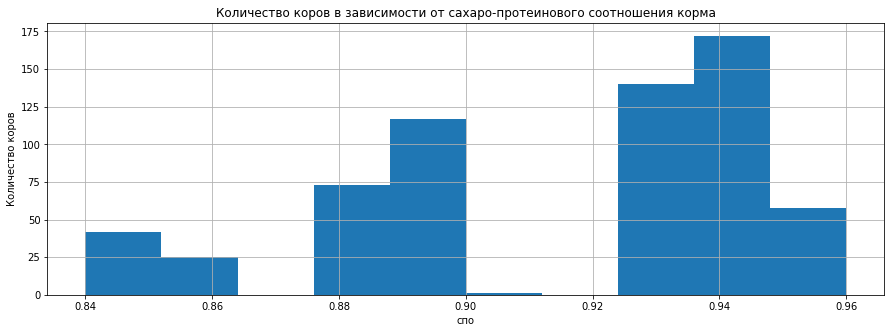

In [36]:
plt.figure(figsize=(15, 5))
plt.hist(ferma_main['спо'], bins=10)
plt.title('Количество коров в зависимости от сахаро-протеинового соотношения корма')
plt.xlabel('спо')
plt.ylabel('Количество коров')
plt.grid(True)
plt.show()

*Данные по сахаро-протеиновому соотношению корма имеют не нормальное распределение. Среднее (0.91) и медианное (0.93) значения отличаются. Вбросов нет.*

##### 3.4. Проанализируем породу коров фермера

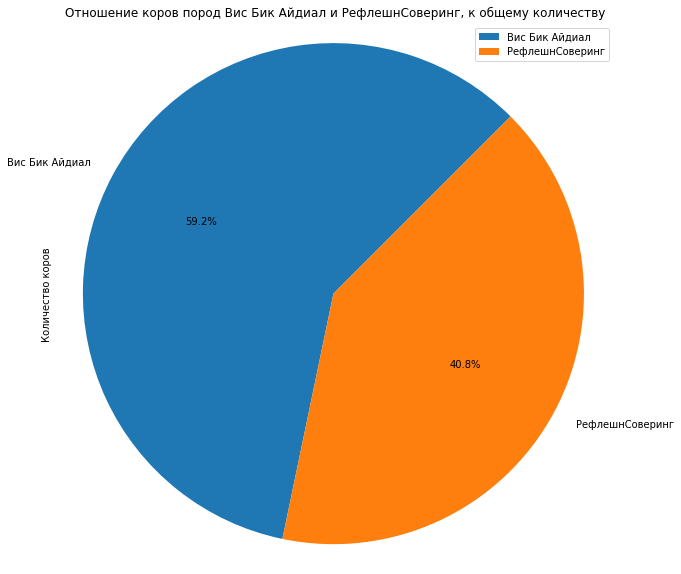

In [37]:
(ferma_main.pivot_table(index='порода', values='id', aggfunc='count') \
.plot.pie(y='id', figsize=(10,10),  label='Количество коров', autopct='%1.1f%%', startangle=45, 
           title='Отношение коров пород Вис Бик Айдиал и РефлешнСоверинг, к общему количеству'))
plt.axis('equal')
plt.show()

*Из данных о породе коров фермера видно, что коров породы Вис Бик Айдиал (58,8%) больше, чем РефлешнСоверинг (41,2%).*

##### 3.5. Проанализируем тип пастбища коров фермера

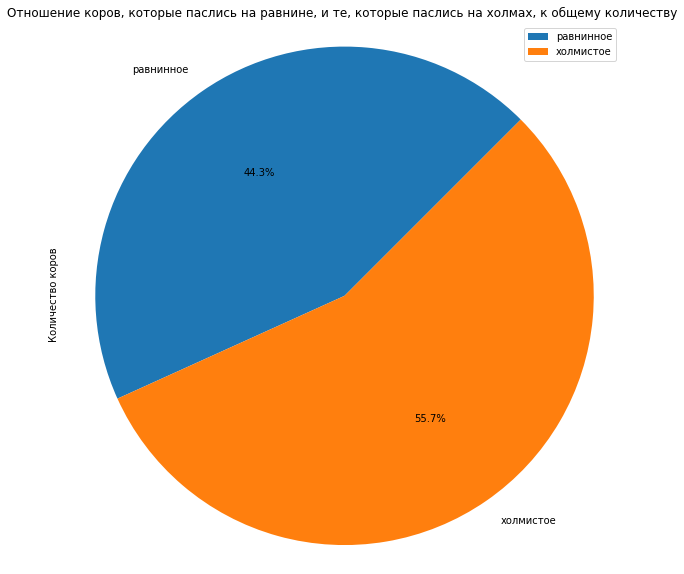

In [38]:
(ferma_main.pivot_table(index='тип_пастбища', values='id', aggfunc='count') \
.plot.pie(y='id', figsize=(10,10),  label='Количество коров', autopct='%1.1f%%', startangle=45, 
           title='Отношение коров, которые паслись на равнине, и те, которые паслись на холмах, к общему количеству'))
plt.axis('equal')
plt.show()

*Из данных о типе пастбища коров фермера видно, что количество коров, которые паслись в холмах (56,1%), больше, чем то, которые паслись на равнине (43,9%).*

##### 3.6. Проанализируем породу папы быка  коров фермера

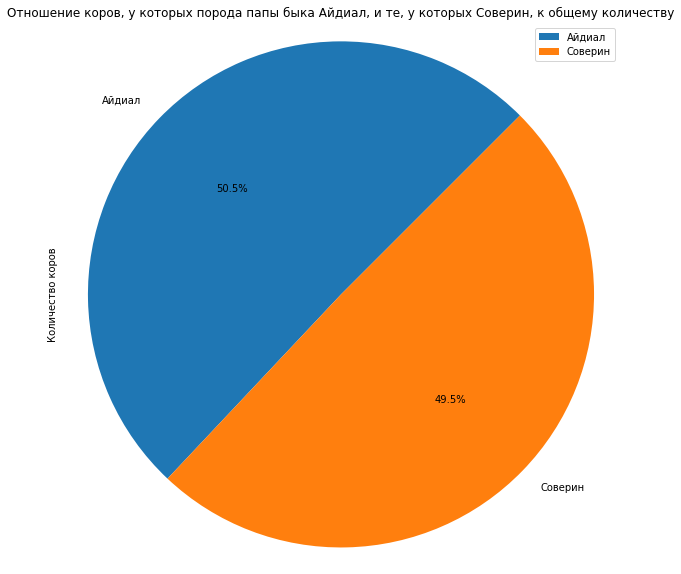

In [39]:
(ferma_main.pivot_table(index='порода_папы_быка', values='id', aggfunc='count') \
.plot.pie(y='id', figsize=(10,10),  label='Количество коров', autopct='%1.1f%%', startangle=45, 
           title='Отношение коров, у которых порода папы быка Айдиал, и те, у которых Соверин, к общему количеству'))
plt.axis('equal')
plt.show()

*Из данных о породе папы коров фермера видно, что количество коров, у которых порода папы Айдиал (50,2%), практически равно, тому, у которых Соверин (49,8%).*

##### 3.7. Проанализируем содержание сырого протеина в корме коров фермера

In [40]:
ferma_main['сырой_протеин_г'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: сырой_протеин_г, dtype: float64

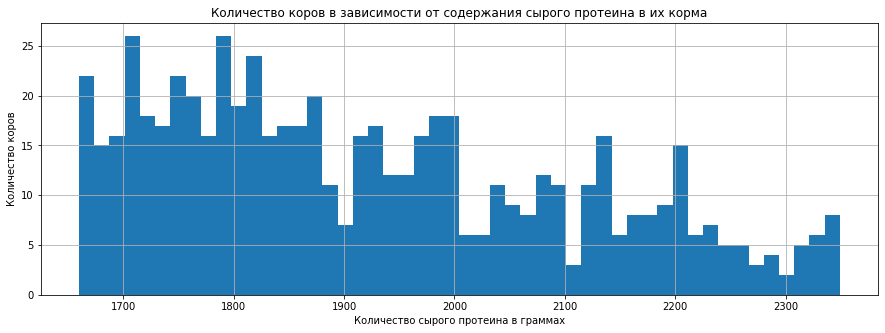

In [41]:
plt.figure(figsize=(15, 5))
plt.hist(ferma_main['сырой_протеин_г'], bins=50)
plt.title('Количество коров в зависимости от содержания сырого протеина в их корма')
plt.xlabel('Количество сырого протеина в граммах')
plt.ylabel('Количество коров')
plt.grid(True)
plt.show()

*Данные по количеству сырого протеина в корме распределены неравномерно. Среднее (1923 г) и медианное (1880 г) значения практически равны. Вбросов нет.*

##### 3.8. Проанализируем процент жирности молока коров фермера

In [42]:
ferma_main['жирность'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность, dtype: float64

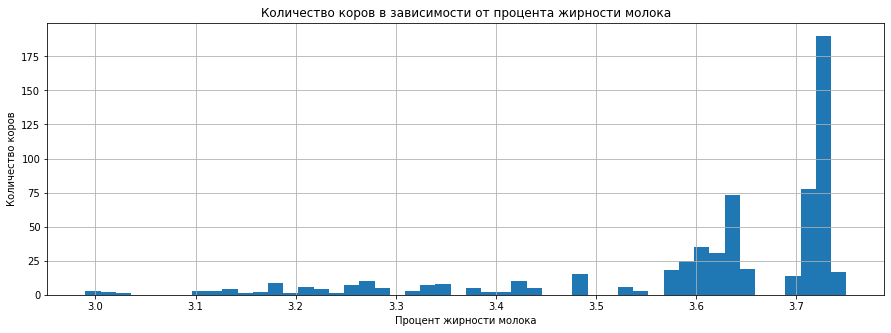

In [43]:
plt.figure(figsize=(15, 5))
plt.hist(ferma_main['жирность'], bins=50)
plt.title('Количество коров в зависимости от процента жирности молока')
plt.xlabel('Процент жирности молока')
plt.ylabel('Количество коров')
plt.grid(True)
plt.show()

*Данные по проценту жира в молоке имеют не нормальное распределение. Среднее (3.61 %) и медианное (3.65 %) значения неравны. Вбросов нет, но видно, что, у более чем 200 коров, процент жирности молока больше 3.7%.*

##### 3.9. Проанализируем процент белка в молоке коров фермера

In [44]:
ferma_main['белок'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок, dtype: float64

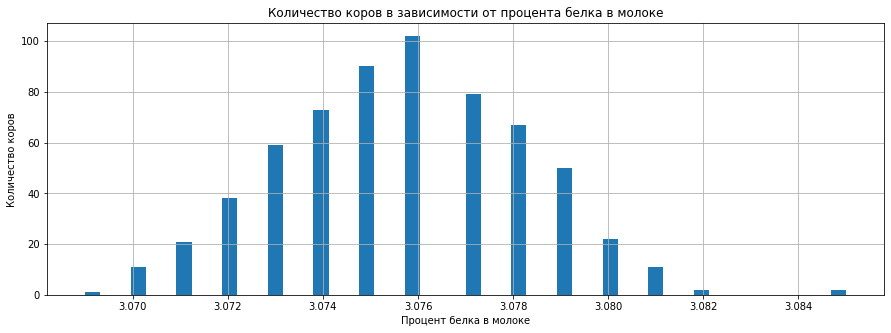

In [45]:
plt.figure(figsize=(15, 5))
plt.hist(ferma_main['белок'], bins=50)
plt.title('Количество коров в зависимости от процента белка в молоке')
plt.xlabel('Процент белка в молоке')
plt.ylabel('Количество коров')
plt.grid(True)
plt.show()

*Данные по проценту белка в молоке имеют нормальное распределение. Среднее (3.076 %) и медианное (3.076 %) значения равны. Вбросы есть на значениях меньше 3,069 и больше 3,081, удалим их.*

In [46]:
ferma_main = ferma_main.query('3.069 < белок < 3.081')

In [47]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                612 non-null    int64  
 1   удой_кг           612 non-null    int64  
 2   эке               612 non-null    float64
 3   сырой_протеин_г   612 non-null    int64  
 4   спо               612 non-null    float64
 5   порода            612 non-null    object 
 6   тип_пастбища      612 non-null    object 
 7   порода_папы_быка  612 non-null    object 
 8   жирность          612 non-null    float64
 9   белок             612 non-null    float64
 10  вкус_молока       612 non-null    object 
 11  возраст           612 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 62.2+ KB


##### 3.10. Проанализируем вкус молока коров фермера

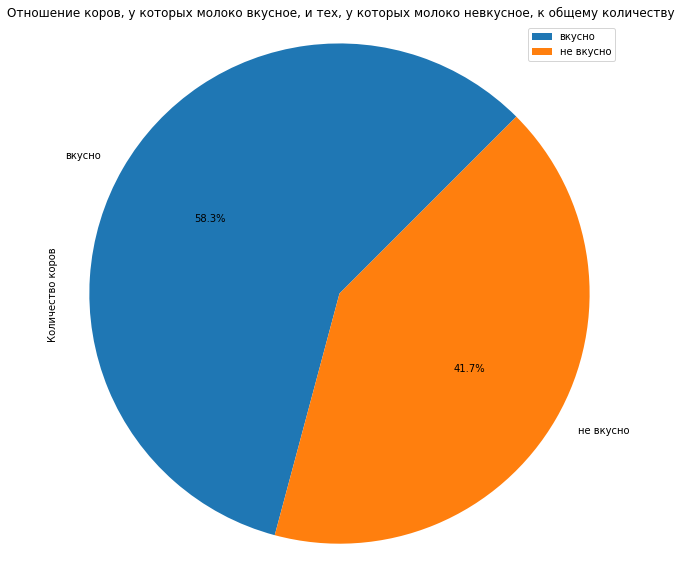

In [48]:
(ferma_main.pivot_table(index='вкус_молока', values='id', aggfunc='count') \
.plot.pie(y='id', figsize=(10,10),  label='Количество коров', autopct='%1.1f%%', startangle=45, 
           title='Отношение коров, у которых молоко вкусное, и тех, у которых молоко невкусное, к общему количеству'))
plt.axis('equal')
plt.show()

*Из данных о вкусе молока коров фермера видно, что количество коров, у которых молоко вкусное (58,5%), больше, чем у тех, чьё молоко невкусное (41,5%).*

##### 3.11. Проанализируем возраст коров фермера

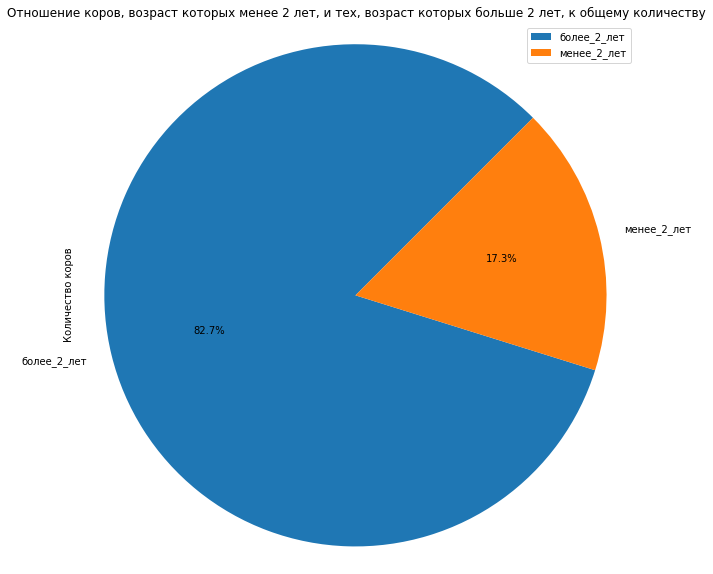

In [49]:
(ferma_main.pivot_table(index='возраст', values='id', aggfunc='count') \
.plot.pie(y='id', figsize=(10,10),  label='Количество коров', autopct='%1.1f%%', startangle=45, 
           title='Отношение коров, возраст которых менее 2 лет, и тех, возраст которых больше 2 лет, к общему количеству'))
plt.axis('equal')
plt.show()

*Из данных о возрасте коров фермера видно, что количество коров, возраст которых больше 2 лет (82,9%), больше, чем у тех, чей возраст меньше 2 лет (17,1%).*

## 4.Корреляционный анализ

##### 4.1. Рассчитаем коэффициенты кореляции между всеми признаками данных о стаде фермера

interval columns not set, guessing: ['удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность', 'белок']


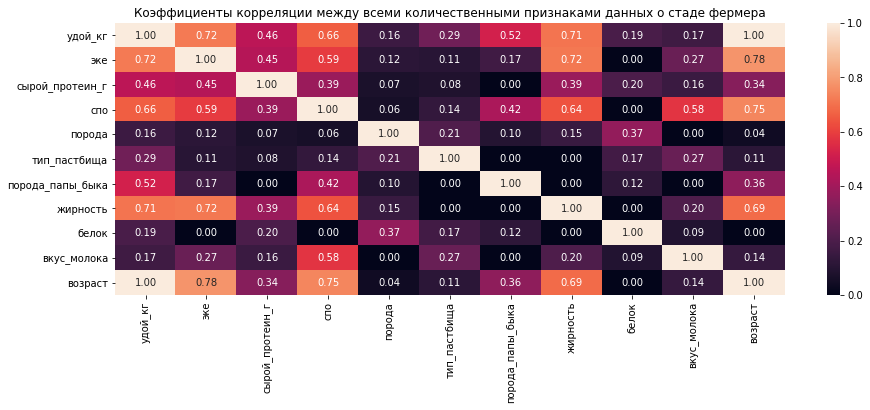

In [50]:
_phik_matrix = ferma_main.drop('id', axis=1).phik_matrix()
plt.figure(figsize=(15, 5));
sns.heatmap(_phik_matrix, annot=True, fmt=".2f");
plt.title('Коэффициенты корреляции между всеми количественными признаками данных о стаде фермера');

*Из данных видно, что наблюдается сильная зависимость удоя от следующих признаков:*
- возраста (1); 
- ЭКЕ (0.72);
- жирность (0.71); 
- СПО (0.66). 

*В меньшей степени зависит от:*
- порода папы быка (0,52)
- содержание сырого протеина в корме (0.46).

*По остальным признакам зависимость слабая.*

##### 4.2. Построим диаграммы рассеивания для удоя и других количественных признаков с учетом значения категориального признака

**4.2.1. Диаграммы рассеяния удоя от признаков с учетом породы коровы**

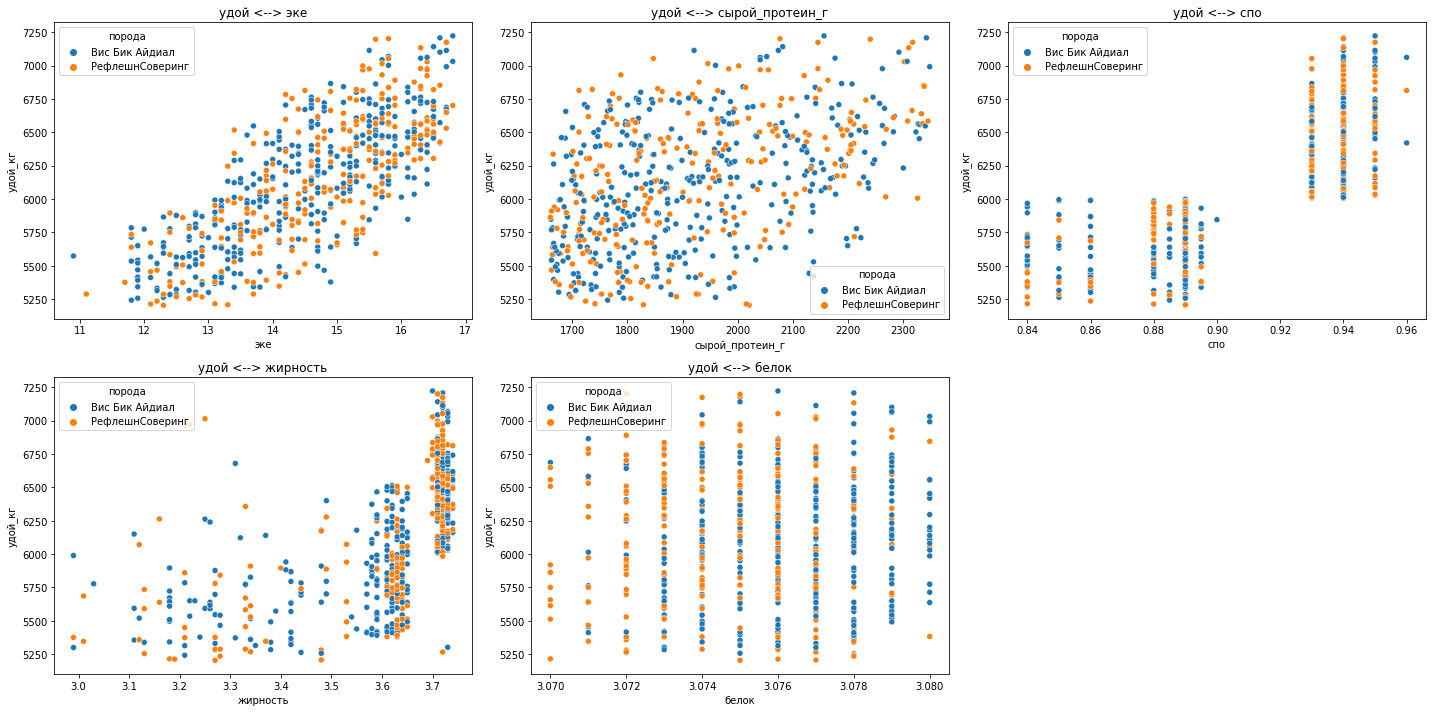

In [51]:
_quantitative_scatter = ['эке', 'сырой_протеин_г', 'спо', 'жирность', 'белок']

plt.figure(figsize=(20, 10))

for i, feature in enumerate(_quantitative_scatter, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=ferma_main, x=feature, y='удой_кг', hue='порода')
    plt.title(f'удой <--> {feature}')

plt.tight_layout()
plt.show()

*При анализе данных по удою с учетом других признаков и с учетом породы коровы установленно следующее:*

- ЭКЕ: Наблюдается положительная взаимосвязь выше умеренного значения. С увеличением "удоя" постепенно увеличивается и эке. По графикам распределения, корреляция справедлива как для одной, так и для другой породы. Коэффициент взаимосвязи: 0.72;
- сырой_протеин: Взаимосвязь между содержанием сырого протеина и удоем не так ясна. На графике диаграмме рассеяния виден довольно большой разброс значений, однако наблюдается общий тренд на прямую пропорциональную зависимость. Связь умеренно положительная. Коэффициент взаимосвязи: 0.46;
- спо: Похоже, что СПО сильно зависит от целевого признака - высокий коэффициент корреляции. В особенности видна резкая тенденция возвышения значений после. Связь похожа на нелинейную. Коэффициент взаимосвязи: 0.66;
- жирность: Умеренно положительная зависимость. Коэффициент взаимосвязи: 0.71;
- белок: Связь между этим признаком и целевым - нелинейная. На меньших значения "белка" - больше значений с породой РефлешнСоверинг, а на бОльших значениях - больше значений породы Вис Бик Айдиал. Коэффициент взаимосвязи: 0.19.

**4.2.2. Диаграммы рассеяния удоя от признаков с учетом типа пастбища**

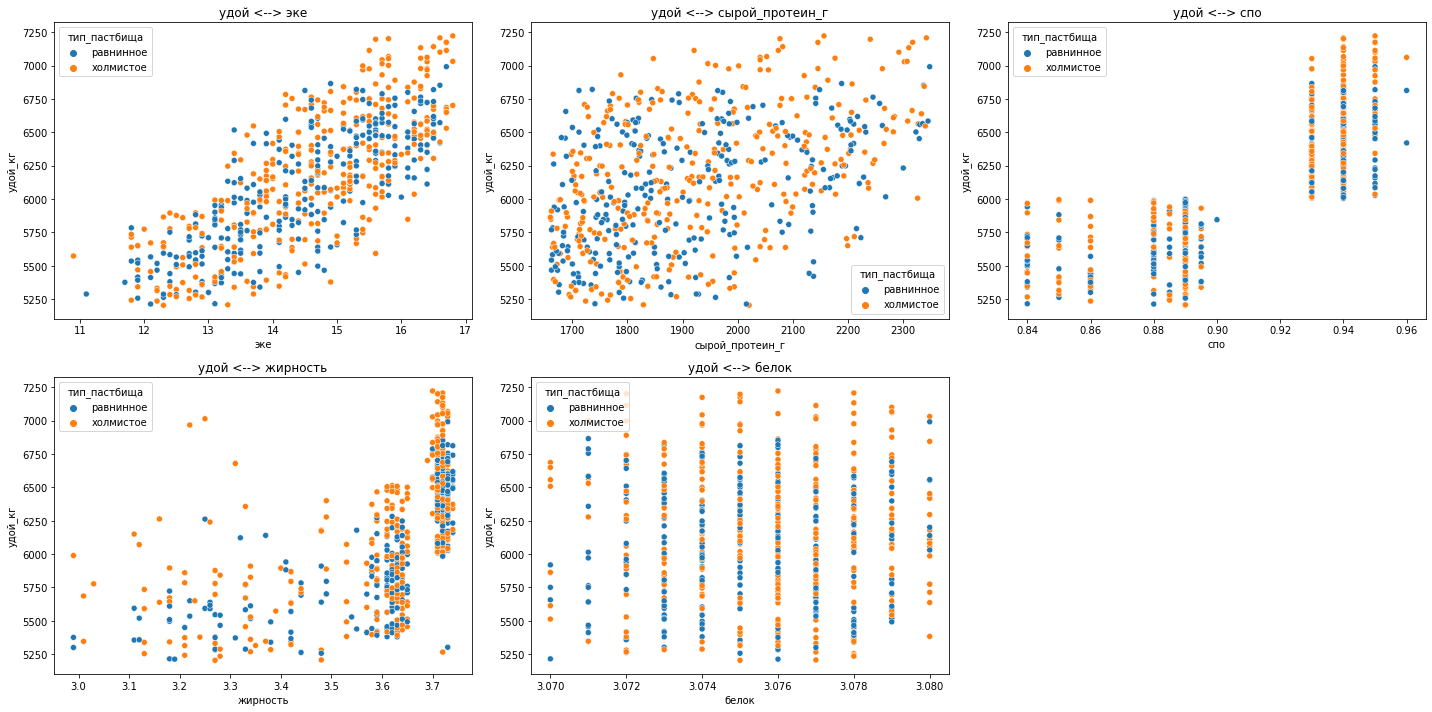

In [52]:
_quantitative_scatter = ['эке', 'сырой_протеин_г', 'спо', 'жирность', 'белок']

plt.figure(figsize=(20, 10))

for i, feature in enumerate(_quantitative_scatter, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=ferma_main, x=feature, y='удой_кг', hue='тип_пастбища')
    plt.title(f'удой <--> {feature}')

plt.tight_layout()
plt.show()

*При анализе данных по удою с учетом других признаков и с учетом типов пастбищ установленно следующее:*

- ЭКЕ: Аналогично выводу из п.4.2.1. Корреляция справедлива для разных типов пастбищ;
- сырой_протеин: Аналогично выводу из п.4.2.1;
- спо: Аналогично выводу из п.4.2.1;
- жирность: Аналогично выводу из п.4.2.1;
- белок: Аналогично выводу из п.4.2.1. Корреляция справедлива для разных типов пастбищ.

**4.2.3. Диаграммы рассеяния удоя от признаков с учетом породы папы быка**

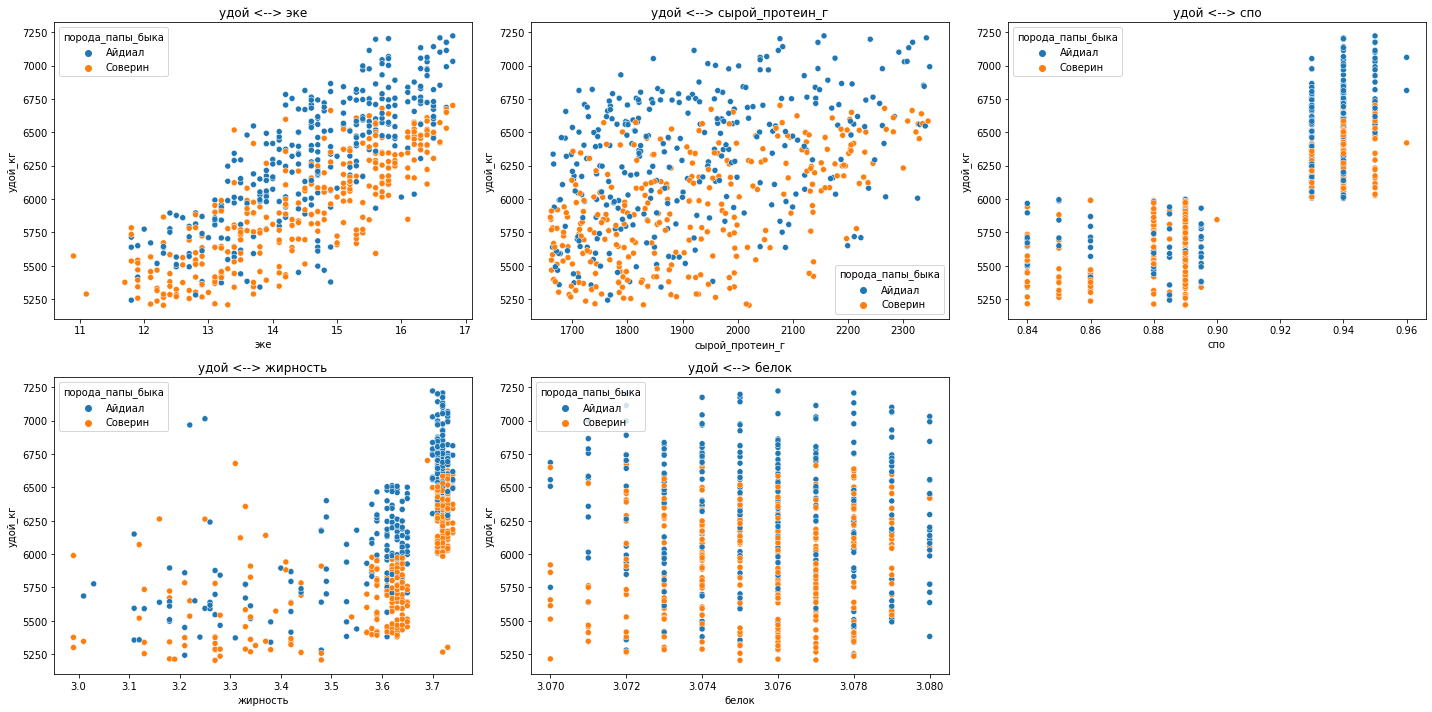

In [53]:
_quantitative_scatter = ['эке', 'сырой_протеин_г', 'спо', 'жирность', 'белок']

plt.figure(figsize=(20, 10))

for i, feature in enumerate(_quantitative_scatter, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=ferma_main, x=feature, y='удой_кг', hue='порода_папы_быка')
    plt.title(f'удой <--> {feature}')

plt.tight_layout()
plt.show()

*При анализе данных по удою с учетом других признаков и с учетом породы папы быка установленно следующее:*

- ЭКЕ: Аналогично выводу из п.4.2.1. Корреляция справедлива для разных пород папы быка;
- сырой_протеин: Аналогично выводу из п.4.2.1;
- спо: Аналогично выводу из п.4.2.1;
- жирность: Аналогично выводу из п.4.2.1;
- белок: Аналогично выводу из п.4.2.1. Корреляция справедлива для разных пород папы быка.

**4.2.4. Диаграммы рассеяния удоя от признаков с учетом вкуса молока**

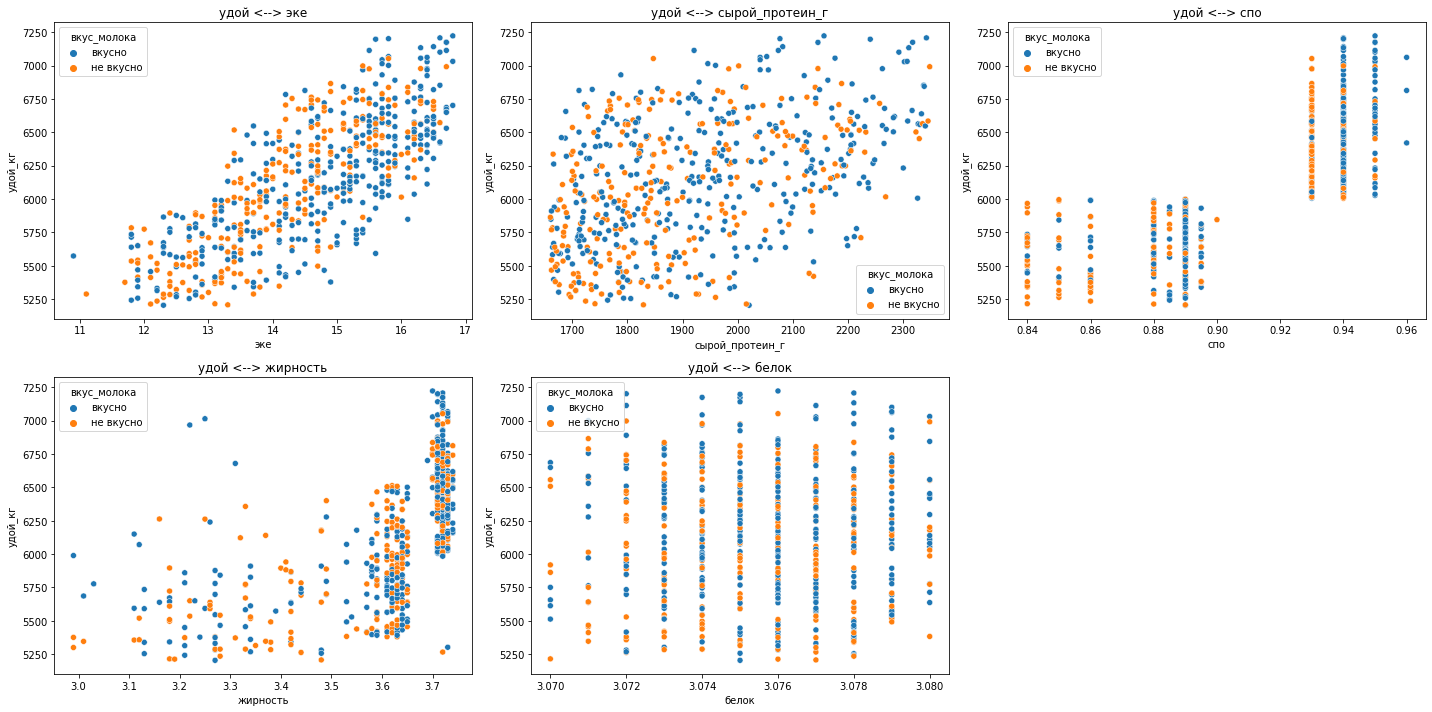

In [54]:
_quantitative_scatter = ['эке', 'сырой_протеин_г', 'спо', 'жирность', 'белок']

plt.figure(figsize=(20, 10))

for i, feature in enumerate(_quantitative_scatter, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=ferma_main, x=feature, y='удой_кг', hue='вкус_молока')
    plt.title(f'удой <--> {feature}')

plt.tight_layout()
plt.show()

*При анализе данных по удою с учетом других признаков и с учетом вкуса молока установленно следующее:*

- ЭКЕ: Аналогично выводу из п.4.2.1. Корреляция справедлива для вкусного и невкусного молока;
- сырой_протеин: Аналогично выводу из п.4.2.1;
- спо: Аналогично выводу из п.4.2.1;
- жирность: Аналогично выводу из п.4.2.1;
- белок: Аналогично выводу из п.4.2.1. Корреляция справедлива для вкусного и невкусного молока.

**4.2.5. Диаграммы рассеяния удоя от признаков с учетом возраста коров**

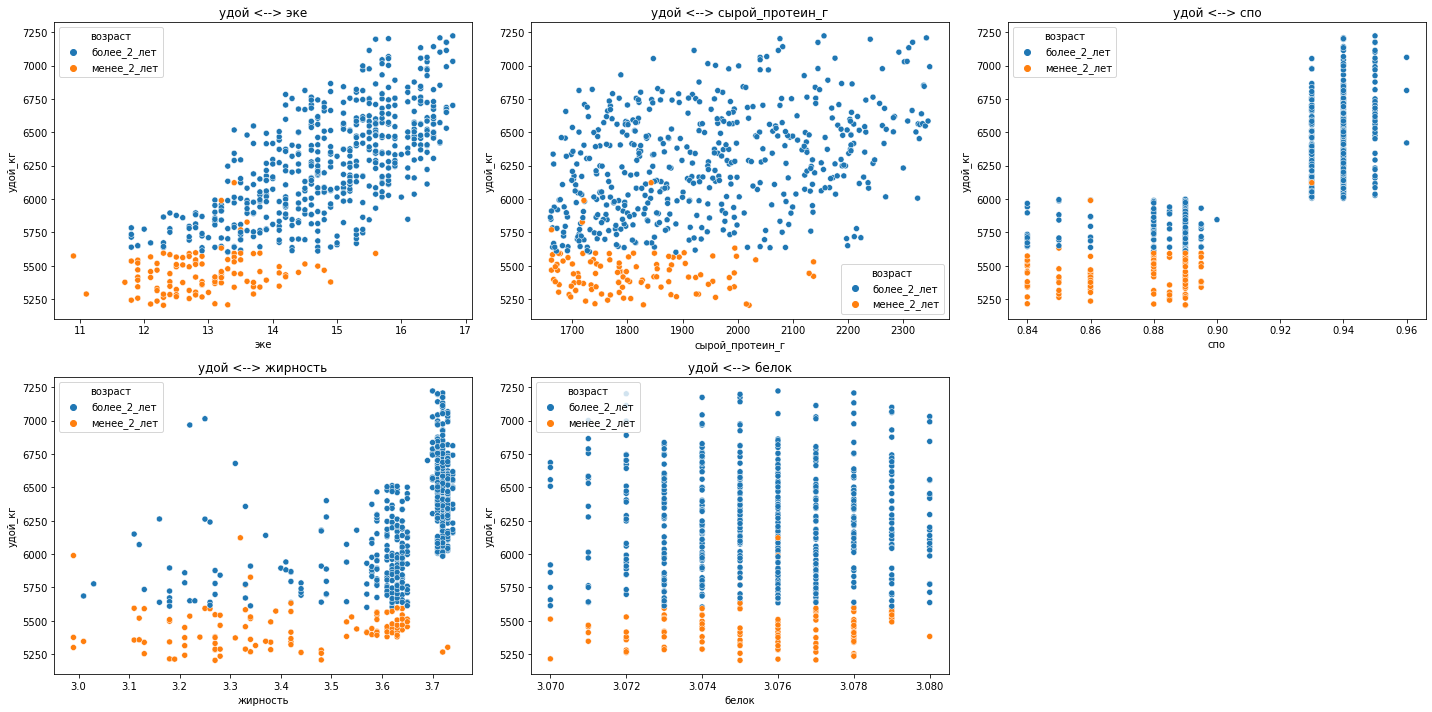

In [55]:
_quantitative_scatter = ['эке', 'сырой_протеин_г', 'спо', 'жирность', 'белок']

plt.figure(figsize=(20, 10))

for i, feature in enumerate(_quantitative_scatter, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=ferma_main, x=feature, y='удой_кг', hue='возраст')
    plt.title(f'удой <--> {feature}')

plt.tight_layout()
plt.show()

*При анализе данных по удою с учетом других признаков и с учетом возраста коров установленно следующее:*

- ЭКЕ: Аналогично выводу из п.4.2.1. Корреляция справедлива для коров старше и младше 2 лет. Также видно, что удой у коров старше 2 лет значительно выше;
- сырой_протеин: Аналогично выводу из п.4.2.1. Также видно, что удой у коров старше 2 лет значительно выше;
- спо: Аналогично выводу из п.4.2.1. Также видно, что удой у коров старше 2 лет значительно выше;
- жирность: Аналогично выводу из п.4.2.1. Также видно, что удой у коров старше 2 лет значительно выше;
- белок: Аналогично выводу из п.4.2.1. Корреляция справедлива для коров старше и младше 2 лет. Также видно, что удой у коров старше 2 лет значительно выше.

## 5. Обучение модели линейной регрессии

##### 5.1. Отбор данных и сформируем модель №1

**5.1.1. Отбор данных**

- Из всех признаков явно можно избавиться от признака белок. С ним связь целевого признака, фактически, отсутствует + абсолютно нелинейна
- жирность - тоже убираем, поскольку признак так же является характеристикой молока и напрямую не связан с таргетом
- Безусловно, признак id для обучения моделей тоже не нужен

In [56]:
ferma_ml = ferma_main.drop(['id', 'белок', 'жирность', 'вкус_молока'], axis=1)
ferma_ml.head(1)

,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,возраст
0,5863,14.2,1743,0.89,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет


**5.1.2. Сформируем модель №1**

In [57]:
X_1 = ferma_ml.drop('удой_кг', axis=1)
y_1 = ferma_ml['удой_кг']
cat_col_names_1 = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
num_col_names_1 = ['эке', 'спо', 'сырой_протеин_г']

Для исследовательского анализа данных и оценки качества моделей создадим функцию.

In [58]:
def models_num(X, y, cat_col_names, num_col_names):
    RANDOM_STATE = 42
    
    # разбиваем выборку
    X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
    )
    
    # Кодируем категориальные признаки
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_valid_ohe = encoder.transform(X_valid[cat_col_names])
    encoder_col_names = encoder.get_feature_names()

    # Масштабируем количественные признаки
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_valid_scaled = scaler.transform(X_valid[num_col_names])

    # Собираем выборки 
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)
    
    # Обучение модели
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_valid)
    r2 = r2_score(y_valid, predictions)
    mse = mean_squared_error(y_valid, predictions)
    rmse = mean_squared_error(y_valid, predictions, squared=False)
    mae = mean_absolute_error(y_valid, predictions)
    print(f'R2_score модели: {r2}, MSE модели {mse}, RMSE модели {rmse}, MAE модели {mae}')
    
    # Выделяем остатки
    residuals = y_valid - predictions

    # Строим гистограмму распределения
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    axes[0].hist(residuals, bins=50, color='lightgreen', edgecolor='black')
    zero = axes[0].vlines(x=0, colors='dimgrey', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
    median = axes[0].vlines(x=residuals.median(), colors='blue', ymin=0, ymax=11, label='Смещение медианы')
    axes[0].legend()
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    # Строим график дисперсии
    axes[1].scatter(predictions, residuals, color='green', alpha=0.4)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()
    
    return [predictions, encoder, scaler]

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 По коду обучения все верно.
</div>    


R2_score модели: 0.7953683335703937, MSE модели 50703.42332113212, RMSE модели 225.17420660708925, MAE модели 174.4082779948097


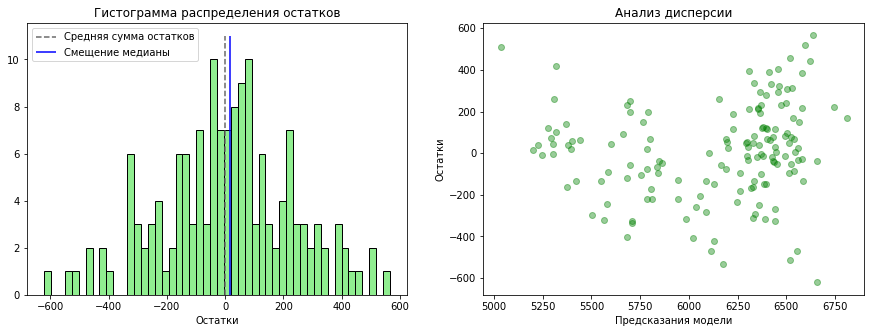

[array([6439.47678523, 6459.7880781 , 6114.04138071, 6430.82804166,
        5502.66962948, 5835.03220179, 6502.07475522, 5786.18303747,
        6745.05990437, 5700.21612623, 6353.16467665, 6440.68322235,
        6359.66166684, 6454.91411602, 6309.96236137, 6381.62367931,
        5033.69319135, 6334.11883893, 5811.94321636, 5848.33510484,
        6334.01115199, 6623.91035972, 6424.14157997, 5399.00574051,
        6553.0489106 , 6296.26629946, 6534.34479939, 5799.47703926,
        6339.19715927, 5442.76899143, 6224.97225131, 6365.66338938,
        6655.56391591, 6402.44724213, 5302.06349055, 6129.01227579,
        6494.58560677, 5377.9979642 , 6523.99717222, 6395.51913331,
        6562.33528118, 6464.02414436, 6395.02569257, 6587.21179502,
        5550.21371267, 5370.78507445, 6523.93831902, 6264.15691271,
        5706.33522053, 6162.96076155, 6520.23628324, 6086.69411052,
        6300.57228088, 5785.04189381, 5987.11526633, 5805.53435403,
        6502.38250209, 6190.40567737, 5562.53693

In [59]:
models_num(X=X_1, y=y_1, cat_col_names=cat_col_names_1, num_col_names=num_col_names_1)

*Основные выводы:*

- Случайность: остатки нормально распределены, график — симметричен от самого частого значения. Смещение медианы предсказаний минимально;
- Устойчивость: в целом, остатки имеют постоянную дисперсию на всём интервале использования модели. Разница между минимумом и максимумом остатков при любых прогнозных значениях модели минимальна. Также, вероятно, модель не очень точно предсказывает значения целевого признака в интервале удой = [5750-6250];
- Для улучшенного моделирования стоит дополнительно получить информацию по коровам, удой которых находится в интервале значений 5750-6250;
- r2_score первой модели = 0.8034133611669033, MSE модели = 48710.034678146425, RMSE модели = 220.70349946964237, MAE модели = 169.9505685991933

##### 5.2. Преобразуем данные и сформируем модель №2

**5.2.1. Преобразование данных**

In [60]:
ferma_ml_2 = ferma_main.copy(deep=True)

display(ferma_main.shape)
display(ferma_ml_2.shape)
display(ferma_ml_2.head())

(612, 12)

(612, 12)

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [61]:
ferma_ml_2['спо_кат'] = ferma_ml_2['спо'].apply(lambda x: 1 if x > 0.91 else 0)
display(ferma_ml_2['спо_кат'].value_counts())

ferma_ml_2['эке_в_квадрате'] = ferma_ml_2['эке'] ** 2

ferma_ml_2 = ferma_ml_2.drop(['id', 'белок', 'жирность', 'эке', 'спо'], axis=1)
ferma_ml_2.head()

1    363
0    249
Name: спо_кат, dtype: int64

,удой_кг,сырой_протеин_г,порода,тип_пастбища,порода_папы_быка,вкус_молока,возраст,спо_кат,эке_в_квадрате
0,5863,1743,Вис Бик Айдиал,равнинное,Айдиал,вкусно,более_2_лет,0,201.64
1,5529,2138,Вис Бик Айдиал,равнинное,Соверин,вкусно,менее_2_лет,0,163.84
2,5810,1854,РефлешнСоверинг,холмистое,Соверин,не вкусно,более_2_лет,0,196.00
3,5895,2012,РефлешнСоверинг,холмистое,Айдиал,не вкусно,более_2_лет,0,153.76
4,5302,1675,Вис Бик Айдиал,равнинное,Соверин,вкусно,менее_2_лет,0,163.84


**5.2.2. Сформируем модель №2**

In [62]:
X_2 = ferma_ml_2.drop('удой_кг', axis=1)
y_2 = ferma_ml_2['удой_кг']
cat_col_names_2 = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']
num_col_names_2 = ['эке_в_квадрате', 'спо_кат', 'сырой_протеин_г']

R2_score модели: 0.8332519251903154, MSE модели 41316.666049668696, RMSE модели 203.2650143277704, MAE модели 153.51168545643048


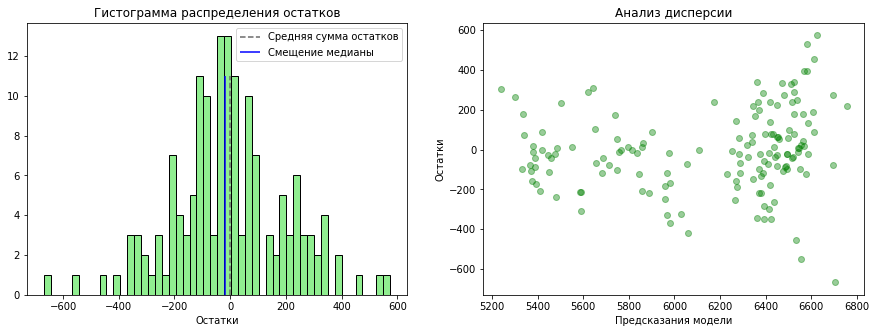

[array([6493.89058834, 6514.18125617, 5969.55494867, 6483.82847694,
        5411.98319231, 5766.96822071, 6502.56589379, 5958.53879172,
        6694.31676753, 5862.53000218, 6345.70910996, 6500.31883567,
        6393.32334194, 6489.65590576, 6352.52534481, 6431.96660454,
        5237.90241257, 6387.31871192, 5657.1753334 , 5796.51423101,
        6342.50062057, 6613.15386906, 6483.04461026, 5477.51942311,
        6534.12119386, 6373.8030875 , 6612.52123594, 5857.8765573 ,
        6392.83739928, 5419.93679345, 6270.28754266, 6419.27675432,
        6697.32002564, 6495.59528031, 5386.67126507, 6055.39585323,
        6518.48942436, 5456.15569755, 6523.5524822 , 6451.37284186,
        6540.26889944, 6539.88202724, 6378.81258804, 6577.72805923,
        5445.17690463, 5335.59446813, 6495.40725664, 6273.28659294,
        5591.79819096, 6230.23133774, 6581.5329296 , 5974.35075651,
        6323.43782451, 5680.67694999, 5889.87473068, 5712.04177005,
        6523.91487615, 6269.83451266, 5480.75956

In [63]:
models_num(X=X_2, y=y_2, cat_col_names=cat_col_names_2, num_col_names=num_col_names_2)

*Основные выводы:*

- Случайность: остатки весьма нормально распределены, график — относительно симметричен от самого частого значения. Отклонение от средней суммы остатков 0 - минимально.
- Устойчивость: дисперсия остатков - нормальная Разница между минимумом и максимумом остатков при любых прогнозных значениях модели минимальна.
- r2_score второй модели = 0.8332519251903154 (метрика увеличилась по сравнению с прошлой моделью), MSE модели = 41316.666049668696, RMSE модели = 203.2650143277704, MAE модели = 153.51168545643048

##### 5.3. Добавим данные из информации о папах коров фермера и сформируем модель №3

**5.3.1. Добавление данных из информации о папах коров фермера**

In [64]:
ferma_full = ferma_main.merge(ferma_dad, on='id')
ferma_full.head()

ferma_full['спо_кат'] = ferma_full['спо'].apply(lambda x: 1 if x > 0.91 else 0)

ferma_full['эке_в_квадрате'] = ferma_full['эке'] ** 2

ferma_full = ferma_full.drop(['id', 'белок', 'жирность', 'эке', 'спо'], axis=1)
ferma_full.head()

,удой_кг,сырой_протеин_г,порода,тип_пастбища,порода_папы_быка,вкус_молока,возраст,имя_папы,спо_кат,эке_в_квадрате
0,5863,1743,Вис Бик Айдиал,равнинное,Айдиал,вкусно,более_2_лет,Буйный,0,201.64
1,5529,2138,Вис Бик Айдиал,равнинное,Соверин,вкусно,менее_2_лет,Соловчик,0,163.84
2,5810,1854,РефлешнСоверинг,холмистое,Соверин,не вкусно,более_2_лет,Барин,0,196.00
3,5895,2012,РефлешнСоверинг,холмистое,Айдиал,не вкусно,более_2_лет,Буйный,0,153.76
4,5302,1675,Вис Бик Айдиал,равнинное,Соверин,вкусно,менее_2_лет,Барин,0,163.84


**5.3.2. Сформируем модель №3**

In [65]:
X_3 = ferma_full.drop('удой_кг', axis=1)
y_3 = ferma_full['удой_кг']
cat_col_names_3 = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст', 'имя_папы']
num_col_names_3 = ['эке_в_квадрате', 'спо_кат', 'сырой_протеин_г']

R2_score модели: 0.8467677260231983, MSE модели 37967.734854850365, RMSE модели 194.85311097041887, MAE модели 146.4625952324208


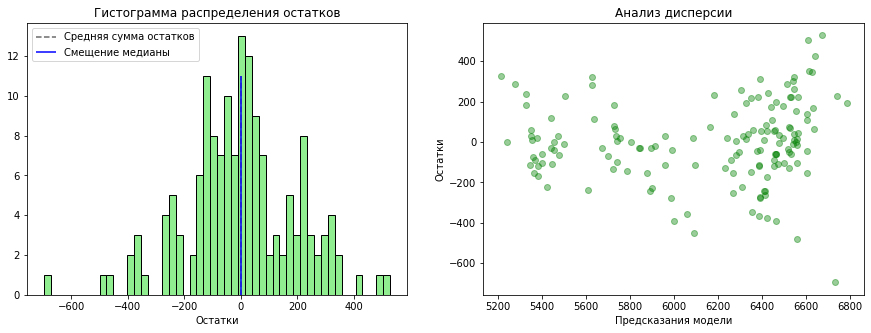

[array([6500.23867113, 6533.91352164, 5742.32711664, 6524.82668612,
        5426.88038038, 5738.44587718, 6524.75194569, 5988.91831071,
        6740.85070563, 5915.98968869, 6305.07056235, 6547.07426323,
        6390.87823479, 6465.24878184, 6327.76076265, 6454.08338864,
        5214.87530604, 6429.1453658 , 5722.56726859, 5807.66998083,
        6360.6739722 , 6641.42609556, 6529.65576089, 5457.02854508,
        6560.12624441, 6392.43452228, 6637.20934138, 5898.06700416,
        6421.60065605, 5475.56837709, 6273.11799098, 6447.87798575,
        6442.24186504, 6533.97071633, 5403.25689852, 6095.14066137,
        6517.08877209, 5480.80318724, 6528.9437778 , 6496.23603857,
        6539.54915774, 6564.49696349, 6422.70372475, 6606.47735983,
        5444.57823007, 5329.2848127 , 6477.24325474, 6308.30831224,
        5351.72837774, 6234.74694426, 6628.29585592, 5992.85410703,
        6281.04336698, 5444.98890502, 5900.94430562, 5702.22143396,
        6547.86249003, 6267.27378667, 5242.98993

In [66]:
models_3 = models_num(X=X_3, y=y_3, cat_col_names=cat_col_names_3, num_col_names=num_col_names_3)
models_3

*Основные выводы:*

- Случайность: остатки в порядке и нормально распределены, график — относительно симметричен от самого частого значения. Отклонение от средней суммы остатков - наименьшее среди всех моделей.
- Устойчивость: дисперсия остатков - нормальная.
- r2_score третьей модели = 0.8467677260231983 (метрика еще увеличилась по сравнению с прошлой моделью - наилучший результат), MSE модели = 37967.734854850365, RMSE модели = 194.85311097041887, MAE модели = 146.4625952324208

*По резулльтату изучения трех моделей видно, что лучшие результаты у модели №3 с показателями: r2_score = 0.8467677260231983, MSE модели = 37967.734854850365, RMSE модели = 194.85311097041887, MAE модели = 146.4625952324208. Поэтому для формирования финальной модели будем использовать модель №3.*

##### 5.4. Формируем финальную модель на основании модели №3

**5.4.1. Сформируем данные модели №3 для расчета доверительного интервала**

In [67]:
RANDOM_STATE = 42
X_train_3, X_valid_3, y_train_3, y_valid_3 = train_test_split(X_3, y_3, random_state=RANDOM_STATE)

# Объединим тренировочную и валидационную выборки
# для того, чтобы позже заново кодировать и масштабировать уже полную тренировочную выборку
X_train_full = pd.concat([X_train_3, X_valid_3], ignore_index=True)
y_train_full = pd.concat([y_train_3, y_valid_3], ignore_index=True)

In [68]:
# Посчитаем 95% доверительный интервал лучшей модели 
print('95% доверительный интервал =',
      st.norm.interval(confidence=0.95, loc=np.mean(models_3[0]), scale=st.sem(models_3[0])))

95% доверительный интервал = (6070.497027590765, 6211.5065511559005)


**5.4.2. Сделаем финальную модель и обучем модель**

In [69]:
# Создаем копию датасета
cow_buy_ml = cow_buy.copy(deep=True)

# Считаем среднее значение каждого недостающего признака и увеличиваем их на 5%
mean_values = ferma_main[['эке', 'сырой_протеин_г', 'спо']].mean()
new_values = mean_values * 1.05

# Добавляем недостающие признаки в датасет cow_buy и преобразовываем их
cow_buy_ml['эке'] = new_values['эке']
cow_buy_ml['эке_в_квадрате'] = cow_buy_ml['эке'] ** 2
cow_buy_ml['сырой_протеин_г'] = new_values['сырой_протеин_г']
cow_buy_ml['спо'] = new_values['спо']
cow_buy_ml['спо_кат'] = cow_buy_ml['спо'].apply(lambda x: 1 if x > 0.91 else 0)

# Форматируем cow_buy
cow_buy_ml = cow_buy_ml.drop(['текущий_уровень_белок', 'эке', 'спо'], axis=1)

X_train_full = X_train_full.drop('вкус_молока', axis=1)

# Проверка
display(cow_buy_ml.shape)
display(X_train_full.shape)
display(cow_buy_ml.head())
display(X_train_full.head())

(20, 9)

(612, 8)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,возраст,эке_в_квадрате,сырой_протеин_г,спо_кат
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,более_2_лет,233.208082,2018.417402,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,менее_2_лет,233.208082,2018.417402,1
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,более_2_лет,233.208082,2018.417402,1
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,более_2_лет,233.208082,2018.417402,1
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,более_2_лет,233.208082,2018.417402,1


,сырой_протеин_г,порода,тип_пастбища,порода_папы_быка,возраст,имя_папы,спо_кат,эке_в_квадрате
0,1984,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,Буйный,1,198.81
1,1984,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,Буйный,1,246.49
2,2067,Вис Бик Айдиал,холмистое,Айдиал,более_2_лет,Буйный,1,249.64
3,2091,Вис Бик Айдиал,равнинное,Соверин,более_2_лет,Соловчик,1,243.36
4,1721,РефлешнСоверинг,равнинное,Соверин,более_2_лет,Барин,0,182.25


In [70]:
# Разделяем признаки на категориальные и количественные
cat_col_names_final = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы', 'спо_кат']
num_col_names_final = ['эке_в_квадрате', 'сырой_протеин_г']

# Кодируем категориальные признаки
X_train_ohe_final = models_3[1].fit_transform(X_train_full[cat_col_names_final])
X_test_ohe_final = models_3[1].transform(cow_buy_ml[cat_col_names_final])
encoder_col_names_final = models_3[1].get_feature_names()

# Масштабируем количественные признаки
X_train_scaled_final = models_3[2].fit_transform(X_train_full[num_col_names_final])
X_test_scaled_final = models_3[2].transform(cow_buy_ml[num_col_names_final])

# Собираем выборки 
X_train_ohe_final = pd.DataFrame(X_train_ohe_final, columns=encoder_col_names_final)
X_test_ohe_final = pd.DataFrame(X_test_ohe_final, columns=encoder_col_names_final)

X_train_scaled_final = pd.DataFrame(X_train_scaled_final, columns=num_col_names_final)
X_test_scaled_final = pd.DataFrame(X_test_scaled_final, columns=num_col_names_final)

X_train_full = pd.concat([X_train_ohe_final, X_train_scaled_final], axis=1)
X_test_full = pd.concat([X_test_ohe_final, X_test_scaled_final], axis=1)

final_reg = LogisticRegression()
final_reg.fit(X_train_full, y_train_full)
pred = final_reg.predict(X_test_full)
pred

array([6755, 6248, 6173, 6501, 6501, 6755, 6755, 6248, 6173, 6501, 6084,
       6755, 6755, 6122, 6173, 6501, 6084, 6755, 6248, 6501])

In [71]:
cow_buy['ожидаемый_удой'] = pred
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,ожидаемый_удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6755
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6248
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6173
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6501
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6501
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6755
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6755
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6248
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6173
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6501


*Вывод по разделу*

- Выявили лучшую модель из трех на валидационной выборке, показатели которой:

MAE - 146.4625952324208

MSE - 37967.73485485037

RMSE - 194.85311097041887

95% доверительный интервал = (6070.497027590764, 6211.5065511559)

- Собрали train + valid выборки в единую обучающую и протестировали модель на тестовой выборке:

Получили предсказания по всем коровам продавца. По условию задачи регрессии, можем на данном этапе рекомендовать фермеру для покупки всех коров. Каждая из них, вероятно, выдает более 6000 кг удоя в год, однако еще стоит предсказать, молоко каких коров будет вкусным

## 6. Обучение модели логистической регрессии

##### 6.1. Подготовка данных

In [72]:
ferma_log = ferma_main.copy(deep=True)

In [73]:
ferma_log['вкус_молока_кат'] = ferma_log['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
ferma_log['спо_кат'] = ferma_log['спо'].apply(lambda x: 1 if x > 0.91 else 0)
ferma_log['эке_в_квадрате'] = ferma_log['эке'] ** 2

ferma_log = ferma_log.drop(['id', 'удой_кг', 'вкус_молока', 'эке', 'спо'], axis=1)

ferma_log.head()

,сырой_протеин_г,порода,тип_пастбища,порода_папы_быка,жирность,белок,возраст,вкус_молока_кат,спо_кат,эке_в_квадрате
0,1743,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,более_2_лет,1,0,201.64
1,2138,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,менее_2_лет,1,0,163.84
2,1854,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,более_2_лет,0,0,196.00
3,2012,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,более_2_лет,0,0,153.76
4,1675,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,менее_2_лет,1,0,163.84


In [74]:
# Выделение признаков, кодирование, масштабирование
X = ferma_log.drop('вкус_молока_кат', axis=1)
y = ferma_log['вкус_молока_кат']

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
    stratify=y
)

# Заранее создадим объединенную тренировочную выборку
X_train_full = pd.concat([X_train, X_valid], ignore_index=True)
y_train_full = pd.concat([y_train, y_valid], ignore_index=True)
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_кат']
num_col_names = ['жирность', 'белок', 'эке_в_квадрате', 'сырой_протеин_г']

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

In [75]:
# Обучение модели
clf = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

clf_accuracy = accuracy_score(y_pred, y_valid)
clf_recall = recall_score(y_pred, y_valid)
clf_precision = precision_score(y_pred, y_valid)

print(f'Accuracy: {clf_accuracy}')
print(f'Recall: {clf_recall}')
print(f'Precision: {clf_precision}')

Accuracy: 0.5947712418300654
Recall: 0.6216216216216216
Precision: 0.7752808988764045


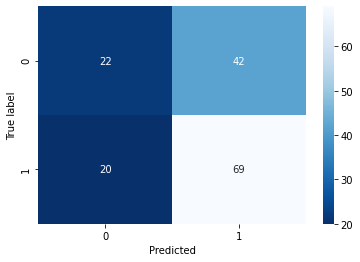

In [76]:
# Построение матрицы ошибок
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

*Выводы*


- Метрика precision имеет неплохое значение - 0.7752808988764045, однако стоит обратить внимание на ошибки первого рода. recall и accuracy близки к показателям "случайной модели", что не совсем хорошо
- Имеем целых 42 ошибок первого рода, по отношению к 69 верноположительным предсказаниям. Больше половины ошибок: нужно минимизировать их количество

##### 6.2. Подготовка данных и подбер порог класса

Ошибка первого рода - критичнее всего при покупке коров, поскольку в таком случае мы рекомендуем фермеру приобрести коров с фактически не вкусным молоком.

- Recall:

В метрике задействуются ответы TP и FN. Ошибки второго рода - не критичны для нас, поскольку нет страшного в том, что мы не предложим фермеру несколько коров, у которых вкусное молоко. Гораздо хуже будет, если предложить не вкусное.

- Precision:

В метрике задействуются ответы TP и FP. Количество FP (ошибок первого рода) нужно сводить к минимуму, ибо они критичны. В таком случае можно сказать, что нам нужно максимизировать метрику Precision.

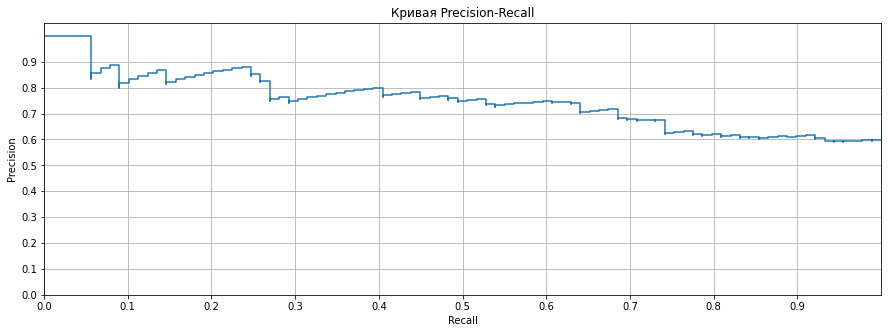

In [77]:
probabilities_valid = clf.predict_proba(X_valid)
precision, recall, thresholds = precision_recall_curve(y_valid, probabilities_valid[:, 1])

plt.figure(figsize=(15, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
plt.grid()
plt.title('Кривая Precision-Recall')
plt.show()

In [78]:
# Выведем вероятности класса predict_proba() и правильные ответы
y_proba = clf.predict_proba(X_valid)[:, 1]

proba_data = pd.DataFrame(zip(y_valid, y_proba),
                          columns=['y_valid', 'y_proba']).sort_values(by='y_proba', ascending=False)

proba_data.head()

,y_valid,y_proba
71,1,0.846098
117,1,0.844203
141,1,0.839866
133,1,0.835299
51,1,0.821333


In [79]:
# Функция расчета метрик для каждого порога
def threshold_choice(threshold_list, proba_df):
    result_df = pd.DataFrame(columns=['порог', 'precision', 'recall', 'количество_FP', 'число_предсказанных_объектов',
                                      'всего_объектов_класса_1'])

    for threshold in threshold_list:
        column_name = 'y_pred_' + str(threshold)

        # Precision
        precision = proba_df.loc[proba_df[column_name] == 1, 'y_valid'].mean()

        # Число предсказанных объектов
        predicted_objects = proba_df[column_name].sum()

        # Всего объектов класса 1
        total_objects_class_1 = proba_df['y_valid'].sum()

        # Recall
        recall = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_valid'] == 1)].shape[
                     0] / total_objects_class_1

        # Количество ложноположительных предсказаний (FP)
        false_positives = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_valid'] == 0)].shape[0]

        # Добавляем результаты в датафрейм
        result_df = result_df.append({
            'порог': threshold,
            'precision': precision,
            'recall': recall,
            'количество_FP': false_positives,
            'число_предсказанных_объектов': predicted_objects,
            'всего_объектов_класса_1': total_objects_class_1,
        }, ignore_index=True)

    return result_df

In [80]:
# Общий перебор порогов
proba_data_1 = proba_data.copy(deep=True)

thresholds_1 = [round(i, 2) for i in np.linspace(0.1, 1, num=10, endpoint=False)]
columns = []

for i in thresholds_1:
    columns.append('y_pred_' + str(i))
    proba_data_1['y_pred_' + str(i)] = proba_data_1['y_proba'].apply(lambda x: 1 if x > i else 0)

proba_data_1.head(5)

,y_valid,y_proba,y_pred_0.1,y_pred_0.19,y_pred_0.28,y_pred_0.37,y_pred_0.46,y_pred_0.55,y_pred_0.64,y_pred_0.73,y_pred_0.82,y_pred_0.91
71,1,0.846098,1,1,1,1,1,1,1,1,1,0
117,1,0.844203,1,1,1,1,1,1,1,1,1,0
141,1,0.839866,1,1,1,1,1,1,1,1,1,0
133,1,0.835299,1,1,1,1,1,1,1,1,1,0
51,1,0.821333,1,1,1,1,1,1,1,1,1,0


In [81]:
# Применение функции
threshold_choice(thresholds_1, proba_data_1)

,порог,precision,recall,количество_FP,число_предсказанных_объектов,всего_объектов_класса_1
0,0.10,0.581699,1.000000,64.0,153.0,89.0
1,0.19,0.581699,1.000000,64.0,153.0,89.0
2,0.28,0.598639,0.988764,59.0,147.0,89.0
3,0.37,0.592857,0.932584,57.0,140.0,89.0
4,0.46,0.606557,0.831461,48.0,122.0,89.0
5,0.55,0.670103,0.730337,32.0,97.0,89.0
6,0.64,0.750000,0.505618,15.0,60.0,89.0
7,0.73,0.774194,0.269663,7.0,31.0,89.0
8,0.82,1.000000,0.056180,0.0,5.0,89.0
9,0.91,NaN,0.000000,0.0,0.0,89.0


*Порог ниже 0.64 дает нам большое количество FP, однако значения выше порога 0.73 - слишком сильно влияют на метрику recall. Проанализируем интервал детальнее.*

In [82]:
# Более детальный перебор порогов
proba_data_2 = proba_data.copy(deep=True)

thresholds_2 = [round(i, 2) for i in np.linspace(0.64, 0.83, num=11, endpoint=False)]

columns = []

for i in thresholds_2:
    columns.append('y_pred_' + str(i))
    proba_data_2['y_pred_' + str(i)] = proba_data_2['y_proba'].apply(lambda x: 1 if x > i else 0)

proba_data_2.head(5)

,y_valid,y_proba,y_pred_0.64,y_pred_0.66,y_pred_0.67,y_pred_0.69,y_pred_0.71,y_pred_0.73,y_pred_0.74,y_pred_0.76,y_pred_0.78,y_pred_0.8,y_pred_0.81
71,1,0.846098,1,1,1,1,1,1,1,1,1,1,1
117,1,0.844203,1,1,1,1,1,1,1,1,1,1,1
141,1,0.839866,1,1,1,1,1,1,1,1,1,1,1
133,1,0.835299,1,1,1,1,1,1,1,1,1,1,1
51,1,0.821333,1,1,1,1,1,1,1,1,1,1,1


In [83]:
# Применение функции
threshold_choice(thresholds_2, proba_data_2)

,порог,precision,recall,количество_FP,число_предсказанных_объектов,всего_объектов_класса_1
0,0.64,0.750000,0.505618,15.0,60.0,89.0
1,0.66,0.759259,0.460674,13.0,54.0,89.0
2,0.67,0.754717,0.449438,13.0,53.0,89.0
3,0.69,0.795455,0.393258,9.0,44.0,89.0
4,0.71,0.769231,0.337079,9.0,39.0,89.0
5,0.73,0.774194,0.269663,7.0,31.0,89.0
6,0.74,0.827586,0.269663,5.0,29.0,89.0
7,0.76,0.869565,0.224719,3.0,23.0,89.0
8,0.78,0.842105,0.179775,3.0,19.0,89.0
9,0.80,0.818182,0.101124,2.0,11.0,89.0


*Порог 0.69 можно считать самым оптимальным, поскольку при нем мы минимизировали количество FP до 9, сохранив половину предсказанных ответов. Да, метрика recall не высока, но наша задача - стремиться к повышению precision при низком количестве FP, что и позволяет сделать данный порог.*

In [84]:
# Выделяем оптимальный порог 
OPTIMAL_THRESHOLD = 0.69

# Применение порога к предсказанным вероятностям
y_pred_threshold = (y_proba > OPTIMAL_THRESHOLD).astype(int)

clf_accuracy_new = accuracy_score(y_valid, y_pred_threshold)
clf_recall_new = recall_score(y_valid, y_pred_threshold)
clf_precision_new = precision_score(y_valid, y_pred_threshold)

print(f'Old Accuracy: {clf_accuracy}')
print(f'Old Recall: {clf_recall}')
print(f'Old Precision: {clf_precision}')
print(f'New Accuracy: {clf_accuracy_new}')
print(f'New Recall: {clf_recall_new}')
print(f'New Precision: {clf_precision_new}')

Old Accuracy: 0.5947712418300654
Old Recall: 0.6216216216216216
Old Precision: 0.7752808988764045
New Accuracy: 0.5882352941176471
New Recall: 0.39325842696629215
New Precision: 0.7954545454545454


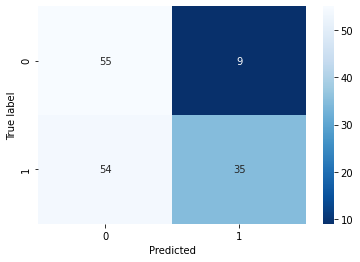

In [85]:
# Построение матрицы ошибок
cm_new = confusion_matrix(y_valid, y_pred_threshold)
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

In [86]:
# Выделяем порог, который делает ошибку нулевой 
OPTIMAL_THRESHOLD = 0.82

# Применение порога к предсказанным вероятностям
y_pred_threshold = (y_proba > OPTIMAL_THRESHOLD).astype(int)

clf_accuracy_new = accuracy_score(y_valid, y_pred_threshold)
clf_recall_new = recall_score(y_valid, y_pred_threshold)
clf_precision_new = precision_score(y_valid, y_pred_threshold)

print(f'Old Accuracy: {clf_accuracy}')
print(f'Old Recall: {clf_recall}')
print(f'Old Precision: {clf_precision}')
print(f'New Accuracy: {clf_accuracy_new}')
print(f'New Recall: {clf_recall_new}')
print(f'New Precision: {clf_precision_new}')

Old Accuracy: 0.5947712418300654
Old Recall: 0.6216216216216216
Old Precision: 0.7752808988764045
New Accuracy: 0.45098039215686275
New Recall: 0.056179775280898875
New Precision: 1.0


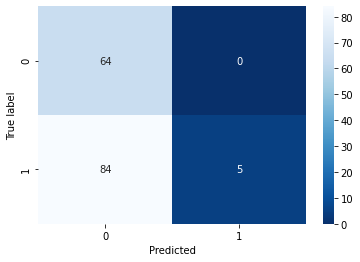

In [87]:
# Построение матрицы ошибок
cm_new = confusion_matrix(y_valid, y_pred_threshold)
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

*Вывод*

- Снизилось количество ошибок первого рода с 42 до 0.

- Анализ по метрикам:

Accuracy уменьшилась до 0.45098039215686275
Recall сильно уменьшилась до 0.056179775280898875
Precision сильно увеличилась до 1 , однако кол-во ошибок первого рода равно 0, что явно более положительно повлияет на результат предсказаний в общей картине.

Далее создадим новую тренировочную выборку, обучим на ней нашу модель с новым порогом и получим предсказания на тестовой выборке.

##### 6.3. Прогноз вкуса молока

In [88]:
cow_buy_ml_2 = cow_buy.copy(deep=True)

In [89]:
# Добавляем недостающие признаки в датасет cow_buy и преобразовываем их
cow_buy_ml_2['эке'] = new_values['эке']
cow_buy_ml_2['эке_в_квадрате'] = cow_buy_ml_2['эке'] ** 2
cow_buy_ml_2['сырой_протеин_г'] = new_values['сырой_протеин_г']
cow_buy_ml_2['спо'] = new_values['спо']
cow_buy_ml_2['спо_кат'] = cow_buy_ml_2['спо'].apply(lambda x: 1 if x > 0.91 else 0)

# Форматируем cow_buy
cow_buy_ml_2.rename(columns={'текущая_жирность': 'жирность', 'текущий_уровень_белок': 'белок'}, inplace=True)
cow_buy_ml_2 = cow_buy_ml_2.drop(['имя_папы', 'эке', 'спо'], axis=1)

# Подготовка признаков

cow_buy_ml_2.head()

,порода,тип_пастбища,порода_папы_быка,жирность,белок,возраст,ожидаемый_удой,эке_в_квадрате,сырой_протеин_г,спо_кат
0,Вис Бик Айдиал,холмистое,Айдиал,3.58,3.076,более_2_лет,6755,233.208082,2018.417402,1
1,Вис Бик Айдиал,равнинное,Соверин,3.54,3.081,менее_2_лет,6248,233.208082,2018.417402,1
2,РефлешнСоверинг,равнинное,Соверин,3.59,3.074,более_2_лет,6173,233.208082,2018.417402,1
3,РефлешнСоверинг,холмистое,Айдиал,3.40,3.061,более_2_лет,6501,233.208082,2018.417402,1
4,РефлешнСоверинг,равнинное,Айдиал,3.64,3.074,более_2_лет,6501,233.208082,2018.417402,1


In [90]:
X_train_full.head()

,сырой_протеин_г,порода,тип_пастбища,порода_папы_быка,жирность,белок,возраст,спо_кат,эке_в_квадрате
0,1795,РефлешнСоверинг,равнинное,Соверин,3.63,3.074,более_2_лет,0,171.61
1,1722,Вис Бик Айдиал,холмистое,Айдиал,3.73,3.076,более_2_лет,1,243.36
2,1981,Вис Бик Айдиал,равнинное,Соверин,3.71,3.076,более_2_лет,1,243.36
3,1813,Вис Бик Айдиал,холмистое,Айдиал,3.62,3.075,более_2_лет,1,222.01
4,1781,РефлешнСоверинг,равнинное,Айдиал,3.73,3.075,более_2_лет,1,243.36


In [91]:
X_test_ohe = encoder.transform(cow_buy_ml_2[cat_col_names])

X_test_scaled = scaler.transform(cow_buy_ml_2[num_col_names])

X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [92]:
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test_full)[:, 1]
predictions_final = (y_proba > OPTIMAL_THRESHOLD).astype(int)

In [93]:
cow_buy['ожидаемый_вкус_молока'] = predictions_final
cow_buy['ожидаемый_вкус_молока'] = cow_buy['ожидаемый_вкус_молока'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')
to_buy = cow_buy.query('ожидаемый_вкус_молока == "вкусно"')
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,ожидаемый_удой,ожидаемый_вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6755,не вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6248,не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6173,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6501,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6501,не вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6755,не вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6755,не вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6248,не вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6173,не вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6501,не вкусно


In [94]:
to_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,ожидаемый_удой,ожидаемый_вкус_молока


## 7. Итоговые выводы

**1. В ходе работы над проектом была разработана модель машинного обучения, которая сможет помочь заказчику управлять рисками и принимать объективное решение о покупке коров на ферму. Рекомендуемые коровы к покупке указаны в строке 94.**

**2. Подготовка и предобработка данных.**

- ferma_main:

Обнаружили 5 явных дубликатов
Определили, что стоит изменить названия столбцов и привести их к единому виду
Не выявили пропущенных значений
Определили, что с типами данных все в порядке

- ferma_dad:

Определили, что стоит изменить названия столбцов и привести их к единому виду
В остальном данные оказались в порядке и пригодными для использования

- cow_buy:

Обнаружили 4 явных дубликата -> решили не убирать, поскольку данных в датасете мало, как и признаков. Вполне вероятно, что данные и признаки сходятся для разных коров
Определили, что стоит изменить названия столбцов и привести их к единому виду
Пропущенных значений не было выявлено
Определили, что с типами данных все в порядке

**3. Исследовательский анализ данных.**

- Выявили, что почти все признаки распределены нормально и не требуют особых корректировок выбросов/
- Убрали аномальное значение признака [удой] = 45616.
- В признаке [белок] избавились от выбросов -> перезаписали датафрейм с условием, в которое входят данные из диапазона от 3.069 до 3.081/
- В распределение категориальных переменных критических изменений внесено не было.

**4. Корреляционный анализ данных.**

- эке: Выявили положительную взаимосвязь выше умеренного значения. С увеличением "удоя" постепенно увеличивается и эке. По графикам распределения, корреляция справедлива для двух пород.

- сырой_протеин: Взаимосвязь между содержанием сырого протеина и удоем не так ясна. На графике диаграмме рассеяния виден довольно большой разброс значений, однако наблюдается общий тренд на прямую пропорциональную зависимость. Связь умеренно положительная.

- спо: Выявили, что СПО зависит от целевого признака - коэффициент корреляции выше среднего. В особенности видна резкая тенденция возвышения значений после - определен "порог перехода" в значении спо = 0.91.

- жирность: Выявлена умеренно положительная зависимость. Более всего связь раскрывается на переходе значений жирность = 3.6 и 3.7.

- белок: Связь между этим признаком и целевым - нелинейная. Но стоит отметить, что наблюдается зависимость между признаками белок и порода. На меньших значения "белка" - больше значений с породой РефлешнСоверинг, а на бОльших значениях - больше значений породы Вис Бик Айдиал.

- возраст имеет сильнейшую взаимосвязь с целевым признаком удой. Коэффициент взаимосвязи: 1.00.

- Между целевым и входными признаками связь в основном линейная, но наличие нелинейных связей также возможно для отдельных пород.

- Яркие нелинейные связи не выявлены, в связи с чем добавление новых признаков - не потребовалось.

- Что касается мультиколлинеарности: матрица показала, что между некоторыми входными признаками есть умеренная корреляция, но нет явных признаков сильной мультиколлинеарности, с которой стоило бы справляться.

**5. Предсказания удоя.**

- Обучили 3 модели линейной регрессии и проанализировали их остатки;

- Выявили лучшую модель из трех на валидационной выборке, показатели которой:

MAE - 146.4625952324208

MSE - 37967.73485485037

RMSE - 194.85311097041887

95% доверительный интервал = (6070.497027590764, 6211.5065511559)
- Собрали train + valid выборки в единую обучающую и протестировали модель на тестовой выборке:

Получили предсказания по всем коровам продавца.

Добавили столбец с предсказаниями в таблицу продавца.

**6. Предсказания вкуса молока.**

- Подобрали параметры и обучили модель логистической регрессии.
- Проанализировали модель и минимизировали количество критических ошибок первого рода с 42 до 0, подобрав новый порог для вероятности предсказаний.
- Определили 4-х коров, чье молоко предсказано как "вкусное" (ошибках первого рода равным 9). Если мы следуем заданию и делаем ошибки первого рода равным 0, то из предложенных коров ни одна не даст "вкусное" молоко.